# Predicting the winner of ICC World Cup ODI 2023 using Data Analytics

Cricket enthusiasts and data enthusiasts alike are drawn to the excitement of predicting the outcomes of major cricket tournaments. The ICC World Cup ODI 2023 is poised to be a thrilling spectacle, bringing together top cricketing nations in a battle for supremacy. In this Python notebook, we embark on a journey to leverage machine learning techniques to predict the winner of the tournament.

## Overview

The task at hand involves a multifaceted approach. We will delve into historical team performance data, individual player statistics, venue and pitch conditions, and other critical factors that influence match outcomes. The goal is to build a predictive model that considers a range of features, providing insights into the potential winner of each match and, ultimately, the entire tournament.

Let the predictions begin!

## Importing required libraries

The following libraries are required to perform data manipulation and analysis to help prediction and discover underlying relationship between various attributes considered.

In [ ]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Datasets

In [ ]:
# Specify the path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/WC_Prediction/World_cup_2023.csv'

# Read the CSV file using pandas
WorldCup = pd.read_csv(file_path)
WorldCup.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [ ]:
# Read the data from "match_results.csv" into the 'results' DataFrame
match_results = pd.read_csv("/content/drive/MyDrive/WC_Prediction/match_results_2015-23.csv")
match_results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [ ]:
# Removing rows with 'Match abandoned' and 'No result' from the 'results' DataFrame."
match_results.drop(match_results[(match_results['Winner'] == 'Match abandoned' )].index, inplace=True)
match_results.drop(match_results[(match_results['Winner'] == 'No result' )].index, inplace=True)

In [ ]:
# Assuming 'one_day_matches' is your DataFrame
one_day_matches = pd.read_csv("/content/drive/MyDrive/WC_Prediction/one-day-matches_1972-2023.csv")
one_day_matches.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",ODI # 1
1,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",ODI # 2
2,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",ODI # 3
3,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",ODI # 4
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",ODI # 5


In [ ]:
ranking=pd.read_csv("/content/drive/MyDrive/WC_Prediction/ranking_data.csv")
ranking.head()

,POS,TEAM,MATCHES,POINTS,RATING
0,1,India,52,6290,121
1,2,Australia,38,4318,114
2,3,South Africa,32,3550,111
3,4,Pakistan,35,3874,111
4,5,New Zealand,41,4189,102


#### <b>1. Australia, the historical favourites  </b>
Australia's cricketing journey in the World Cup began with a triumph in 1987, and since then, they have etched their name as the undisputed champions on multiple occasions. The team has clinched the coveted trophy an astounding five times, showcasing an unparalleled level of dominance and consistency.

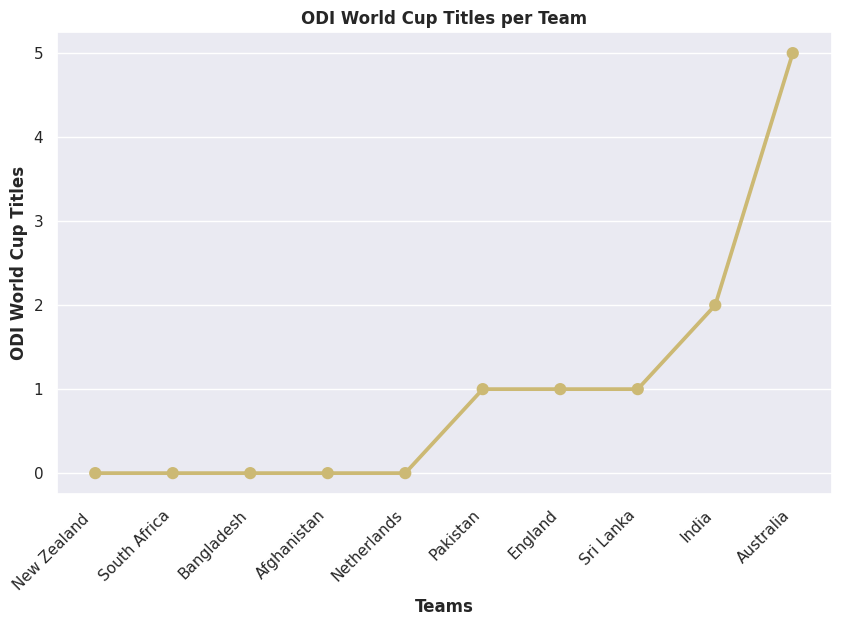

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'WorldCup' is your DataFrame
# Sort the DataFrame by 'Titles' in ascending order
WorldCup_sorted = WorldCup.sort_values(by='Titles', ascending=True)

# Set the figure size using sns.set
sns.set(rc={'figure.figsize': (10, 6)})

# Create a point plot using sns.pointplot to visualize team titles
sns.pointplot(x='Team_name', y='Titles', data=WorldCup_sorted, color='y', markers='o', linestyles='-')

# Customize the chart
plt.xlabel("Teams", fontweight='bold')
plt.ylabel("ODI World Cup Titles", fontweight='bold')
plt.title("ODI World Cup Titles per Team", fontweight='bold')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

What sets Australia apart is not just the number of titles but the consistency with which they have reached the pinnacle of world cricket. The team has reached the final match on an impressive number of occasions, showcasing a relentless pursuit of excellence.

Australia's brand of cricket in World Cups has been characterized by a perfect blend of individual brilliance and teamwork. Whether it's the dominance of their batsmen, the precision of their bowlers, or the brilliance on the field, Australia has consistently raised the bar for cricketing excellence.

#### <b>  2. India- The Glorious Reign of Team India in ODI Cricket (2019-2023)
</b>


Team India's journey in the ODI cricket arena from 2019 to 2023 stands as a testament to their exceptional prowess, strategic brilliance, and unyielding spirit on the field. With a stellar combination of seasoned veterans and emerging talents, India has carved a legacy of excellence during these years.

<b>Dominance at the Batting Crease:</b>

One of the defining features of Team India's performance has been their formidable batting lineup. Led by cricketing maestros such as Virat Kohli, Rohit Sharma, and Shikhar Dhawan, the team has consistently delivered match-winning performances. The ability to chase daunting targets and set imposing totals has become a trademark of India's batting prowess.

<b>Versatile Bowling Attack:</b>

India's bowling unit, characterized by pacers and spinners alike, has showcased versatility and adaptability. Jasprit Bumrah's pinpoint accuracy, the spin wizardry of Ravindra Jadeja, and the emergence of young talents like Prasidh Krishna have combined to form a formidable bowling arsenal. The team's knack for taking crucial wickets at pivotal moments has often been the catalyst for victory.

<b>Consistency in Tournaments:</b>

India's performance in major ODI tournaments during this period has been nothing short of remarkable. Whether it's the ICC Cricket World Cup or bilateral series, Team India has consistently reached the latter stages, showcasing their ability to thrive under pressure on the global stage.

In [ ]:
one_day_matches.tail()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
4616,U.A.E.,U.S.A.,U.A.E.,1 run,Harare,"Jul 6, 2023",ODI # 4617
4617,Sri Lanka,West Indies,Sri Lanka,8 wickets,Harare,"Jul 7, 2023",ODI # 4618
4618,Bangladesh,Afghanistan,Afghanistan,142 runs,Chattogram,"Jul 8, 2023",ODI # 4619
4619,Netherlands,Sri Lanka,Sri Lanka,128 runs,Harare,"Jul 9, 2023",ODI # 4620
4620,Bangladesh,Afghanistan,Bangladesh,7 wickets,Chattogram,"Jul 11, 2023",ODI # 4621


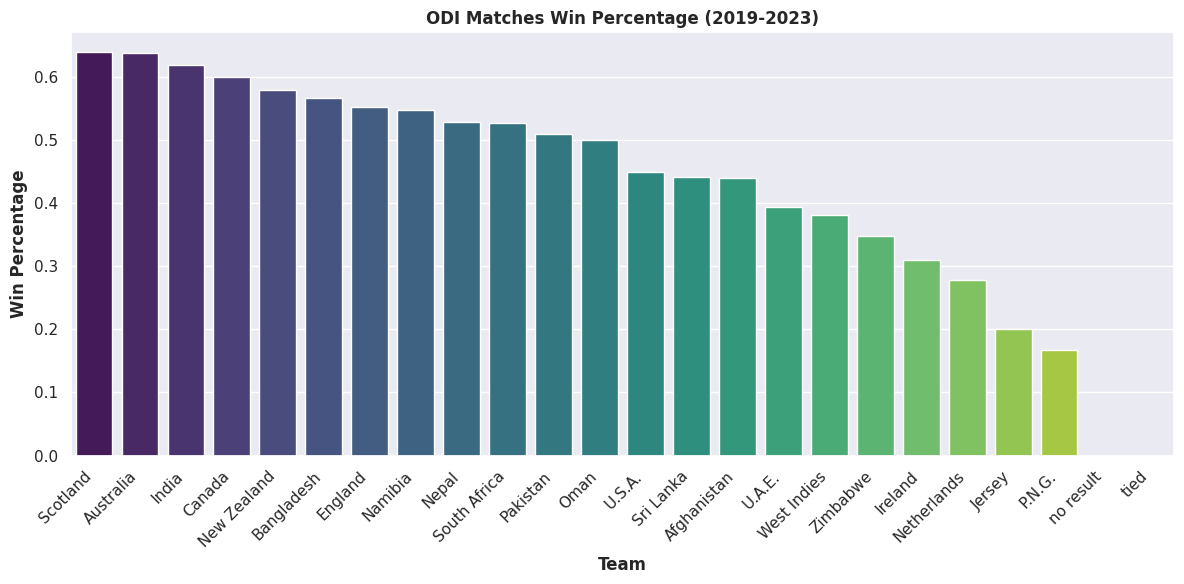

In [ ]:
# Define a function to handle parsing with errors
def parse_date(date_string):
    try:
        return pd.to_datetime(date_string, errors='coerce')
    except ValueError:
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Apply the function to the 'Match Date' column
one_day_matches['Match Date'] = one_day_matches['Match Date'].apply(parse_date)

# Assuming 'one_day_matches' is your DataFrame containing the provided data
# Convert 'Match Date' to datetime
one_day_matches['Match Date'] = pd.to_datetime(one_day_matches['Match Date'])

# Filter data for matches played between 2019 and 2023
recent_matches = one_day_matches[(one_day_matches['Match Date'].dt.year >= 2019) & (one_day_matches['Match Date'].dt.year <= 2023)]
# Filter data for matches played between 2019 and 2023
recent_matches = one_day_matches[(one_day_matches['Match Date'].dt.year >= 2019) & (one_day_matches['Match Date'].dt.year <= 2023)]

# Calculate win percentage for each team
team_win_counts = recent_matches['Winner'].value_counts().reset_index()
team_win_counts.columns = ['Team', 'Wins']

# Calculate total matches played by each team
team_matches_played = pd.concat([recent_matches['Team 1'], recent_matches['Team 2']])
team_matches_played = team_matches_played.value_counts().reset_index()
team_matches_played.columns = ['Team', 'Matches Played']

# Merge dataframes to calculate win percentage
team_win_percentage = pd.merge(team_win_counts, team_matches_played, on='Team', how='outer')
team_win_percentage['Win Percentage'] = team_win_percentage['Wins'] / team_win_percentage['Matches Played']

# Set the figure size using sns.set
sns.set(rc={'figure.figsize': (12, 6)})

# Create a bar plot using Seaborn
sns.barplot(x='Team', y='Win Percentage', data=team_win_percentage.sort_values(by='Win Percentage', ascending=False), palette='viridis')

# Display the plot
plt.title('ODI Matches Win Percentage (2019-2023)', fontweight='bold')
plt.xlabel('Team', fontweight='bold')
plt.ylabel('Win Percentage', fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

####<b> 3. South Africa as favourites</b>

South Africa, in recent times, has undergone a cricketing revival, signaling their intent to reclaim their status as one of the cricketing giants. ODI matches have witnessed the Proteas delivering clinical performances, with both bat and ball.

The team's batting lineup, featuring seasoned campaigners and emerging talents, has shown resilience and flair, while the bowling unit has been adept at restricting opponents. South Africa's resurgence in ODI cricket has injected a fresh sense of optimism, making them a team to watch out for in the knockout stages.

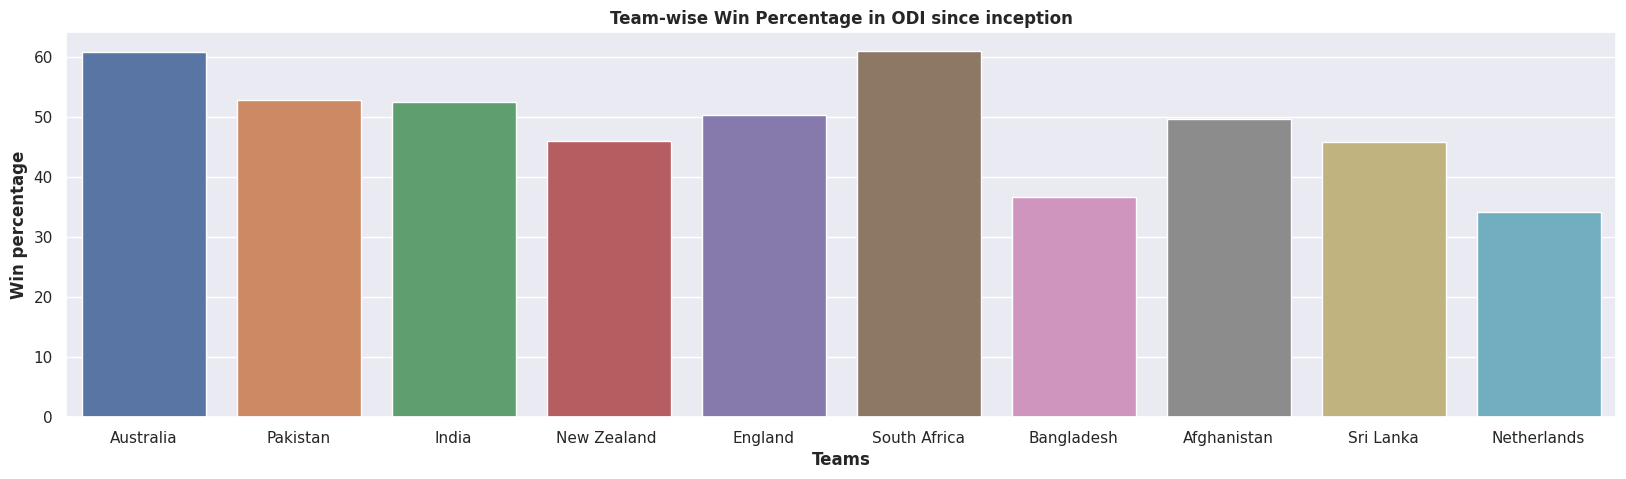

In [ ]:
# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize': (20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='Win_percentage_ODI', data=WorldCup)

# Display the plot
plt.xlabel("Teams", fontweight='bold')
plt.ylabel("Win percentage", fontweight='bold')
plt.title("Team-wise Win Percentage in ODI since inception", fontweight='bold')  # Make the title bold
plt.show()


As the cricketing world gears up for the upcoming ODI World Cup, two cricketing powerhouses, Australia and South Africa, have emerged as formidable contenders, thanks to their exceptional recent performances in ODI matches and series against other countries. So, South Africa has high chance of winning this Tournament alongside Australia, due to their wins in recent years. Australia and South Africa, with their recent stellar performances, are undoubtedly on the radar as strong contenders to lift the coveted trophy.

<b>4. New Zealand's success in ODI World Cups</b>

Despite potentially having fewer wins in ordinary series, can be attributed to several factors. Success in tournaments like the ODI World Cup often requires a combination of strategic planning, team dynamics, and peak performance during key matches. Here are some factors that might contribute to New Zealand's success in ODI World Cups:

<b>Tournament-Specific Preparation:</b>
 Teams often prepare differently for major tournaments compared to bilateral series. The focus is on peaking at the right time during the tournament, and strategies may be tailored to suit specific opponents and conditions.

<b>Team Dynamics: </b>
The cohesion and teamwork within the squad can play a crucial role. New Zealand has often been known for its strong team spirit, effective leadership, and the ability to perform well under pressure.

<b>Key Player Performances:</b>
 Individual brilliance, especially from key players, can be a deciding factor in tournaments. Exceptional performances from key players during critical moments can significantly impact the team's success.

<b>Adaptability: </b>
Successful teams can adapt to different playing conditions, pitches, and opposition strategies. New Zealand's ability to adapt to diverse conditions worldwide may contribute to their success in global tournaments.

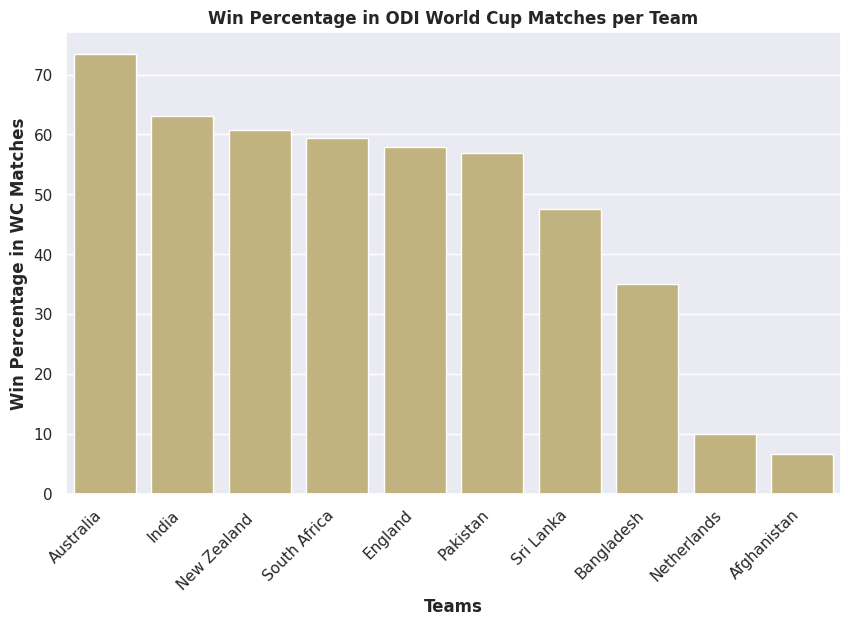

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'match_results' is your DataFrame
# Sort the DataFrame by 'Win_percent_WC' in descending order
WC_match_results_sorted = WorldCup.sort_values(by='Win_percent_WC', ascending=False)

# Set the figure size using sns.set
sns.set(rc={'figure.figsize': (10, 6)})

# Create a bar plot using sns.barplot to visualize win percentage in WC matches
sns.barplot(x='Team_name', y='Win_percent_WC', data=WC_match_results_sorted, color='y')

# Customize the chart
plt.xlabel("Teams", fontweight='bold')
plt.ylabel("Win Percentage in WC Matches", fontweight='bold')
plt.title("Win Percentage in ODI World Cup Matches per Team", fontweight='bold')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## England and Pakistan in the race

## <b>Teams with lesser probability</b>

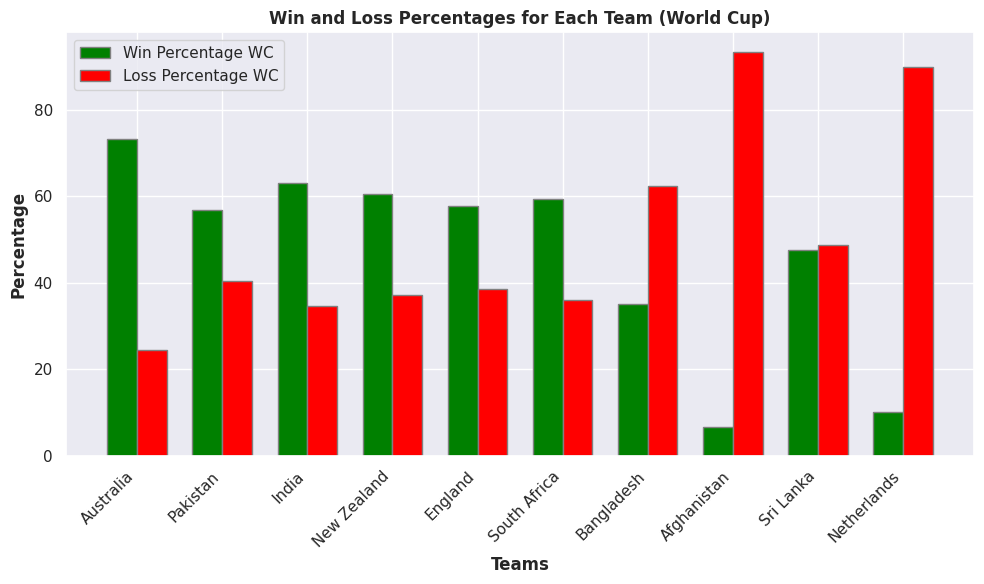

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace this with your DataFrame)
data = {
    'Team_name': ['Australia', 'Pakistan', 'India', 'New Zealand', 'England', 'South Africa', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'Netherlands'],
    'Win_percent_WC': [73.40, 56.96, 63.09, 60.67, 57.83, 59.37, 35.00, 6.66, 47.50, 10.00],
    'Loss_percent_WC': [24.46, 40.50, 34.52, 37.07, 38.55, 35.93, 62.50, 93.33, 48.75, 90.00]
}

df = pd.DataFrame(data)

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on X-axis for each team
r1 = range(len(df))
r2 = [x + bar_width for x in r1]

# Create the double bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(r1, df['Win_percent_WC'], color='green', width=bar_width, edgecolor='grey', label='Win Percentage WC')
plt.bar(r2, df['Loss_percent_WC'], color='red', width=bar_width, edgecolor='grey', label='Loss Percentage WC')

# Customize the chart
plt.xlabel('Teams', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df))], df['Team_name'], rotation=45, ha='right')  # Rotate the labels
plt.title('Win and Loss Percentages for Each Team (World Cup)',fontweight='bold')
plt.legend()

# Show the chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend()
plt.show()


#### <b>7. Afghanistan's Aspirations and Hurdles:</b>

While Afghanistan's journey in international cricket has been inspirational, World Cups have presented formidable challenges. The team's aspirations to make a mark have been hindered by a tough competition, lack of experience, and adapting to the pressures of global tournaments.

#### <b>8. Netherlands' Search for Stability:</b>

Netherlands, despite flashes of brilliance, has been on a quest for stability and sustained success in World Cups. The team's underperformance can be attributed to the challenges of consistently competing against established cricketing nations and adapting to the demands of top-tier cricket.

#### <b>9. Sri Lanka's Downturn:</b>

Once a force to be reckoned with in international cricket, Sri Lanka has experienced a downturn in World Cup performances. Challenges in finding a consistent playing XI, coupled with the retirement of cricketing legends, have contributed to their struggles on the grand stage.

#### <b>10. Bangladesh's Unfulfilled Potential:</b>

Bangladesh, often considered a rising force in cricket, has grappled with unlocking its full potential on the World Cup stage. While they have had moments of brilliance, the team has faced difficulties in translating their talent into consistent performances throughout the tournament.

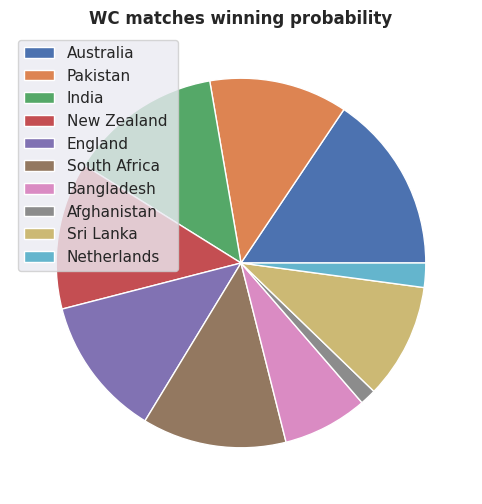

In [ ]:
plt.pie(WorldCup["WC_match_won"]/WorldCup["WC_matches"])
plt.legend(WorldCup["Team_name"])
plt.title("WC matches winning probability",fontweight='bold')
plt.show()

<b>Assessing the Impact:</b>

The underperformance of these teams not only reflects the challenges faced on the field but also prompts a deeper analysis of the infrastructure, player development, and strategic planning within their cricketing systems. These nations may find opportunities for improvement by addressing key areas such as player fitness, talent scouting, and grooming young talents.

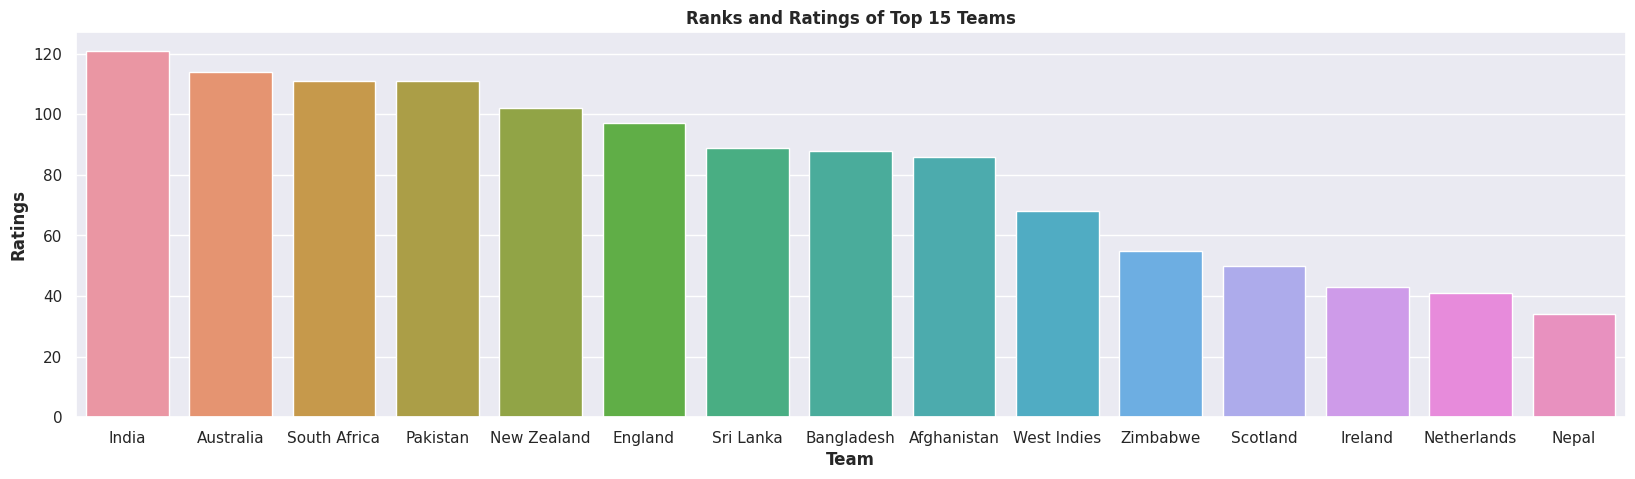

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ranking' is your DataFrame
# Sort the DataFrame by 'RATING' column in descending order
ranking_sorted = ranking.sort_values(by='RATING', ascending=False)

# Select the top 15 rows
top_15_teams = ranking_sorted.head(15)

# Set the figure size for the bar plot using Seaborn
sns.set(rc={'figure.figsize': (20, 5)})

# Create a bar plot using Seaborn to display recent ratings of teams
sns.barplot(x='TEAM', y='RATING', data=top_15_teams)

# Customize the chart
plt.xlabel('Team', fontweight='bold')
plt.ylabel('Ratings', fontweight='bold')
plt.title('Ranks and Ratings of Top 15 Teams', fontweight='bold')

# Display the plot
plt.show()

## <b>Stats of top five teams in the ODI world cup 2023</b>
## Stats of Indian team

In [ ]:
# Filter the 'results' DataFrame to include rows where India played either as Team_1 or Team_2
df = match_results[(match_results['Team_1'] == 'India') | (match_results['Team_2'] == 'India')]

# Create a new DataFrame 'India' containing all rows from the filtered DataFrame
India = df.iloc[:]

# Display the first few rows of the 'India' DataFrame
India.head()


,Date,Team_1,Team_2,Winner,Margin,Ground
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
13,21/06/2015,Bangladesh,India,Bangladesh,won by 6 wickets,Shere Bangla National Stadium
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club


In [ ]:
# Filtering the 'India' dataframe to create a new dataframe 'India_win' containing rows where the 'Winner' column is 'India'.
India_win = India[India['Winner']=='India']
India_win.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club
20,14/07/2015,Zimbabwe,India,India,won by 83 runs,Harare Sports Club
73,23/01/2016,Australia,India,India,won by 6 wickets,Sydney Cricket Ground


## No.of wins in ODIs against other teams

In [ ]:
# Exclude Team India's name
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = India_win[India_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)


Team_2
West Indies     6
New Zealand     4
Australia       3
Sri Lanka       3
England         2
South Africa    2
Name: count, dtype: int64


In [ ]:
# Exclude Team India's name
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = India_win[India_win['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)


Team_1
Zimbabwe         5
South Africa     5
West Indies      5
Bangladesh       4
Zimbabwe         4
Australia        2
Sri Lanka        2
England          2
England          1
Hong Kong        1
New Zealand      1
Afghanistan      1
Australia        1
Bangladesh       1
Name: count, dtype: int64


## Displaying Team India's wins against other teams using bar graph

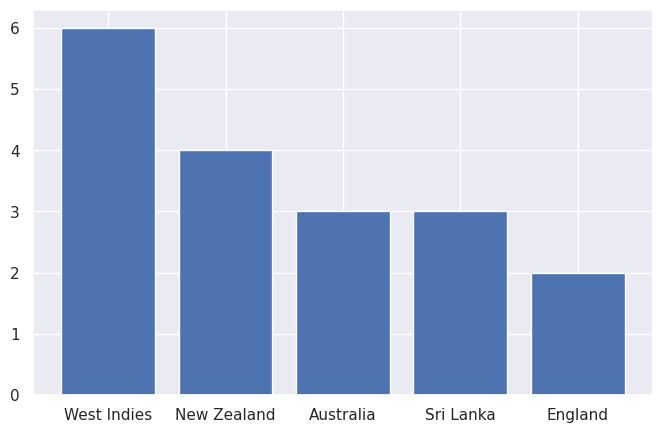

In [ ]:
# Exclude Team India
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = India_win[India_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="b")
plt.show()


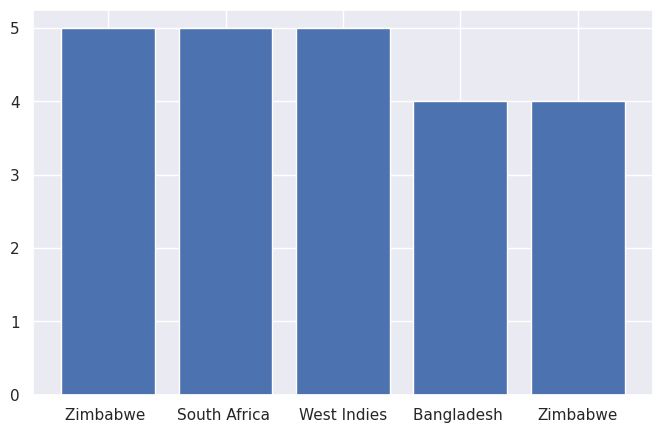

In [ ]:
# Exclude Team India
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = India_win[India_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="b")
plt.show()


## Win Percentage of India Against Each Team

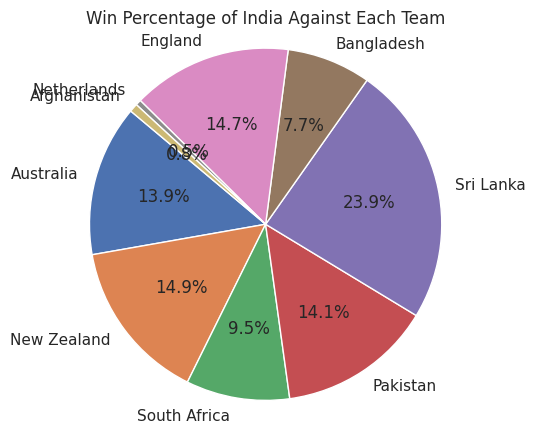

In [ ]:
# Number of wins against each team
# Out of the 1032 ODI matches played by India, number of matches won against the following teams
team_win_counts = {
    'Australia': 54,
    'New Zealand': 58,
    'South Africa ': 37,
    'Pakistan': 	55,
    'Sri Lanka': 93,
    'Bangladesh': 30,
    'England': 57,
    'Netherlands': 2,
    'Afghanistan': 3
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# India's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of India Against Each Team')

# Display the pie chart
plt.show()


## Win Percentage of India in the ODI world cup

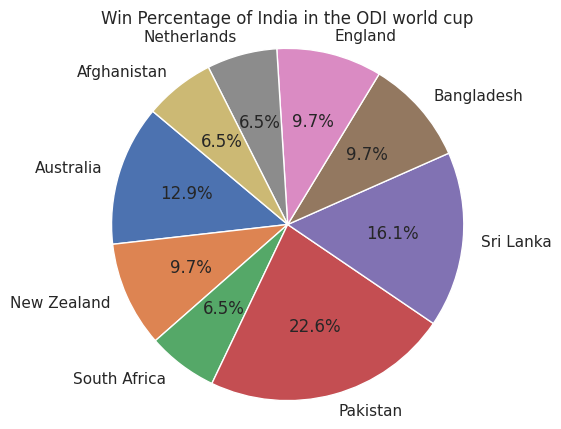

In [ ]:
# Number of wins against each team in the ODI world cup
# Out of the 84 ODI matches played by India in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_ind = {
    'Australia': 4,
    'New Zealand': 3,
    'South Africa ': 2,
    'Pakistan': 7,
    'Sri Lanka': 5,
    'Bangladesh': 3,
    'England': 3,
    'Netherlands': 2,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_ind = sum(team_win_counts_wc_ind.values())

# India's win percentages against each team is calculated
win_percentages_wc_ind = {team: (wins / total_matches_wc_ind) * 100 for team, wins in team_win_counts_wc_ind.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_ind.values(), labels=win_percentages_wc_ind.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of India in the ODI world cup')

# Display the pie chart
plt.show()


## Stats of Australian team

In [ ]:
# Filter the 'match_results' DataFrame to include rows where Australia played either as Team_1 or Team_2
df1 = match_results[(match_results['Team_1'] == 'Australia') | (match_results['Team_2'] == 'Australia')]

# Create a new DataFrame 'Australia' containing all rows from the filtered DataFrame
Australia = df1.iloc[:]

# Display the first few rows of the 'Australia' DataFrame
Australia.head()


,Date,Team_1,Team_2,Winner,Margin,Ground
32,27/08/2015,Ireland,Australia,Australia,won by 23 runs,Civil Service Cricket Club
33,03/09/2015,England,Australia,Australia,won by 59 runs,The Rose Bowl
34,05/09/2015,England,Australia,Australia,won by 64 runs,Lord's
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
36,11/09/2015,England,Australia,England,won by 3 wickets,Headingley


In [ ]:
# Filtering the 'Australia' dataframe to create a new dataframe 'Australia_win' containing rows where the 'Winner' column is 'Australia'.
Australia_win = Australia[Australia['Winner']=='Australia']
Australia_win.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
37,12/09/2015,England,Australia,Australia,won by 8 wickets,Old Trafford
79,06/02/2016,New Zealand,Australia,Australia,won by 4 wickets,Sky Stadium
85,05/06/2016,West Indies,Australia,Australia,won by 6 wickets,Providence Stadium
88,11/06/2016,Australia,South Africa,Australia,won by 36 runs,Warner Park
97,21/06/2016,West Indies,Australia,Australia,won by 6 wickets,Kensington Oval



## No.of wins for Australia against other teams

In [ ]:
# Exclude Team Australia's name
excluded_value = 'Australia'

# Filtering out rows with the excluded value
filtered_df = Australia_win[Australia_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)


Team_2
England         4
New Zealand     4
 Pakistan       2
India           2
Zimbabwe        2
South Africa    1
Pakistan        1
Name: count, dtype: int64


In [ ]:
# Exclude Team Australia's name
excluded_value = 'Australia'

# Filtering out rows with the excluded value
filtered_df = Australia_win[Australia_win['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)


Team_1
Sri Lanka       4
Pakistan        4
West Indies     3
India           3
England         2
Pakistan        2
England         2
West Indies     2
Sri Lanka       2
India           2
New Zealand     1
Afghanistan     1
Name: count, dtype: int64


## Displaying Team Australia's wins against other teams using bar graph

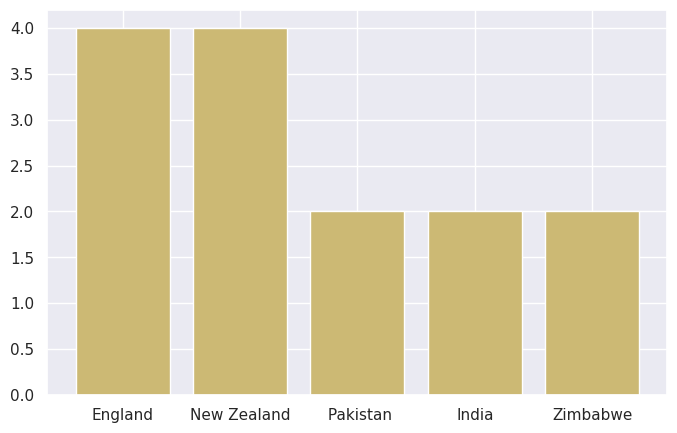

In [ ]:
# Exclude Team Austrlia
exclude = 'Australia'

# Filter out the opponent to exclude from the data
filtered_data = Australia_win[Australia_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Australlia.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="y")
plt.show()


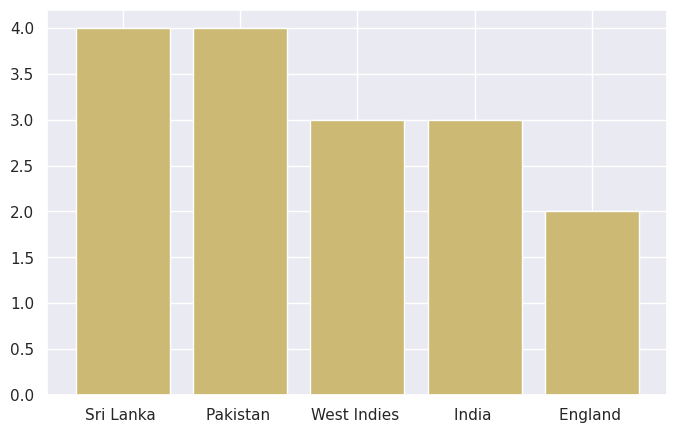

In [ ]:
# Exclude Team Austrlia
exclude = 'Australia'

# Filter out the opponent to exclude from the data
filtered_data = Australia_win[Australia_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Australlia.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="y")
plt.show()


## Win Percentage of Australia Against Each Team

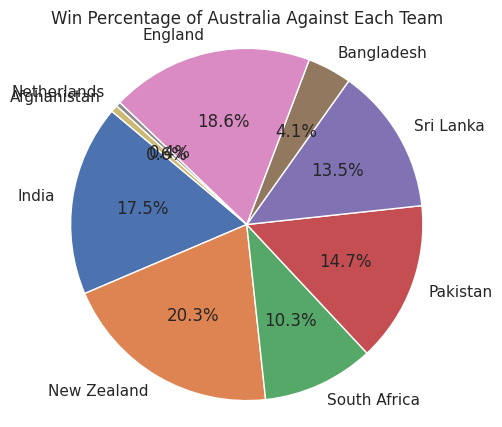

In [ ]:
# Number of wins against each team
# Out of the 978 ODI matches played by Australia, number of matches won against the following teams
team_win_counts = {
    'India': 82,
    'New Zealand': 95,
    'South Africa ': 48,
    'Pakistan': 69,
    'Sri Lanka': 63,
    'Bangladesh': 19,
    'England': 87,
    'Netherlands': 2,
    'Afghanistan': 3
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# Australia's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Australia Against Each Team')

# Display the pie chart
plt.show()


## Win Percentage of Australia in the ODI world cup

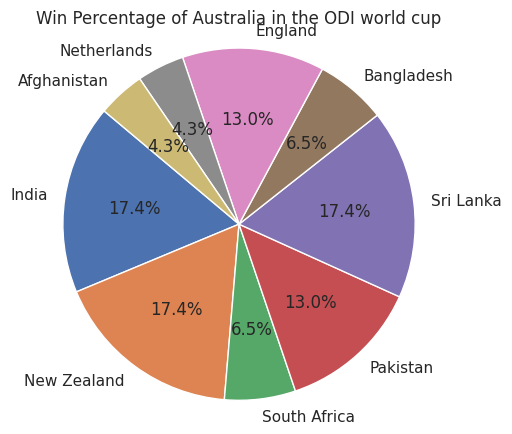

In [ ]:
# Number of wins against each team in the ODI world cup
# Out of the 94 ODI matches played by Australia in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_aus = {
    'India': 8,
    'New Zealand': 8,
    'South Africa ': 3,
    'Pakistan': 6,
    'Sri Lanka': 8,
    'Bangladesh': 3,
    'England': 6,
    'Netherlands': 2,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_aus = sum(team_win_counts_wc_aus.values())

# Australia's win percentages against each team is calculated
win_percentages_wc_aus = {team: (wins / total_matches_wc_aus) * 100 for team, wins in team_win_counts_wc_aus.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_aus.values(), labels=win_percentages_wc_aus.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Australia in the ODI world cup')

# Display the pie chart
plt.show()


## Stats of Pakistan team

In [ ]:
# Filter the 'match_results' DataFrame to include rows where Pakistan played either as Team_1 or Team_2
df2 = match_results[(match_results['Team_1'] == 'Pakistan') | (match_results['Team_2'] == 'Pakistan')]

# Create a new DataFrame 'Pakistan' containing all rows from the filtered DataFrame
Pakistan = df2.iloc[:]

# Display the first few rows of the 'Pakistan' DataFrame
Pakistan.head()


,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
17,11/07/2015,Sri Lanka,Pakistan,Pakistan,won by 6 wickets,Rangiri Dambulla International Stadium
21,15/07/2015,Sri Lanka,Pakistan,Sri Lanka,won by 2 wickets,Pallekele International Cricket Stadium


In [ ]:
# Filtering the 'Pakistan' dataframe to create a new dataframe 'Pakistan_win' containing rows where the 'Winner' column is 'Pakistan'.
Pakistan_win = Pakistan[Pakistan['Winner']=='Pakistan']
Pakistan_win.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
17,11/07/2015,Sri Lanka,Pakistan,Pakistan,won by 6 wickets,Rangiri Dambulla International Stadium
23,19/07/2015,Sri Lanka,Pakistan,Pakistan,won by 135 runs,R Premadasa Stadium
24,22/07/2015,Sri Lanka,Pakistan,Pakistan,won by 7 wickets,R Premadasa Stadium
38,01/10/2015,Zimbabwe,Pakistan,Pakistan,won by 131 runs,Harare Sports Club
40,05/10/2015,Zimbabwe,Pakistan,Pakistan,won by 7 wickets,Harare Sports Club


## No.of wins for Pakistan against other teams

In [ ]:
# Exclude Team Pakistan's name
excluded_value = 'Pakistan'

# Filtering out rows with the excluded value
filtered_df = Pakistan_win[Pakistan_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)


Team_2
New Zealand    5
West Indies    3
Sri Lanka      2
Zimbabwe       2
Australia      2
Name: count, dtype: int64


In [ ]:
# Exclude Team Pakistan's name
excluded_value = 'Pakistan'

# Filtering out rows with the excluded value
filtered_df = Pakistan_win[Pakistan_win['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_1' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)


Team_1
Zimbabwe         7
Sri Lanka        3
Netherlands      3
England          2
Afghanistan      2
South Africa     2
Ireland          1
Australia        1
Hong Kong        1
South Africa     1
New Zealand      1
Name: count, dtype: int64


## Displaying Team Pakistan's wins against other teams using bar graph

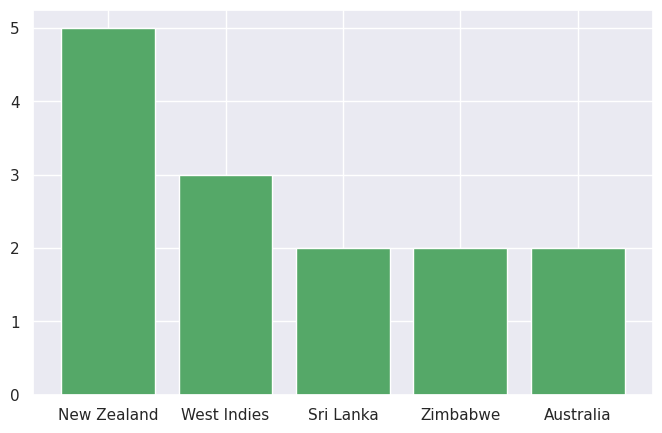

In [ ]:
# Exclude Team Pakistan
exclude = 'Pakistan'

# Filter out the opponent to exclude from the data
filtered_data = Pakistan_win[Pakistan_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Pakistan.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="g")
plt.show()


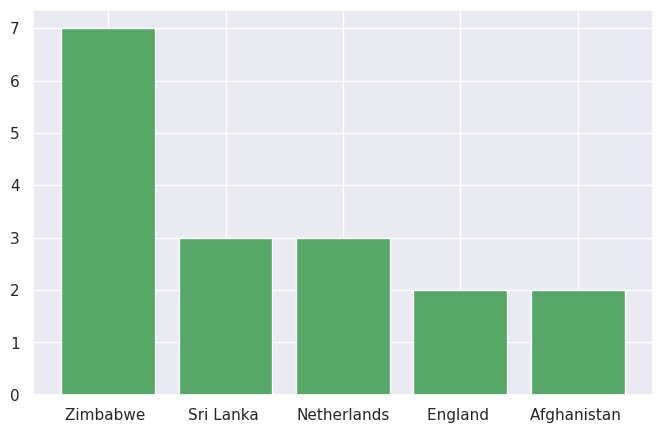

In [ ]:
# Exclude Team Pakistan
exclude = 'Pakistan'

# Filter out the opponent to exclude from the data
filtered_data = Pakistan_win[Pakistan_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by Pakistan.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="g")
plt.show()


## Win Percentage of Pakistan Against Each Team

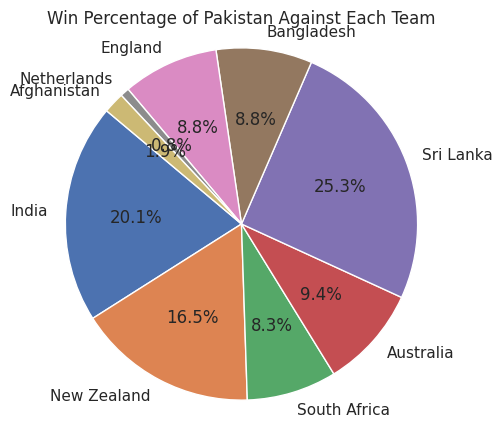

In [ ]:
# Number of wins against each team
# Out of the 945 ODI matches played by Pakistan, number of matches won against the following teams
team_win_counts = {
    'India': 73,
    'New Zealand': 60,
    'South Africa ': 30,
    'Australia': 34,
    'Sri Lanka': 92,
    'Bangladesh': 32,
    'England': 32,
    'Netherlands': 3,
    'Afghanistan': 7
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# Pakistan's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Pakistan Against Each Team')

# Display the pie chart
plt.show()


## Win Percentage of Pakistan in the ODI world cup

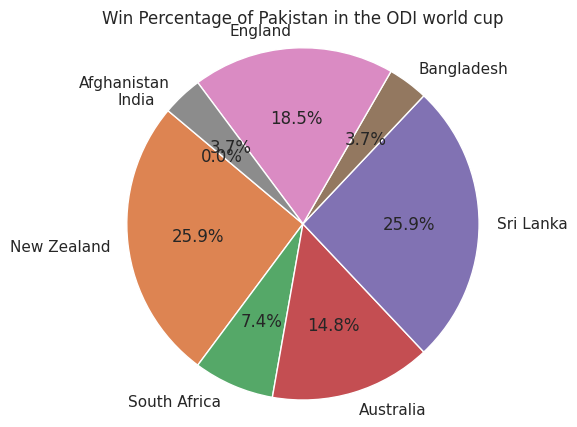

In [ ]:
# Number of wins against each team in the ODI world cup
# Out of the 79 ODI matches played by Pakistan in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_pak = {
    'India': 0,
    'New Zealand': 7,
    'South Africa ': 2,
    'Australia': 4,
    'Sri Lanka': 7,
    'Bangladesh': 1,
    'England': 5,
    'Afghanistan': 1
}

# Total matches played is calculated
total_matches_wc_pak = sum(team_win_counts_wc_pak.values())

# Pakistan's win percentages against each team is calculated
win_percentages_wc_pak = {team: (wins / total_matches_wc_pak) * 100 for team, wins in team_win_counts_wc_pak.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_pak.values(), labels=win_percentages_wc_pak.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of Pakistan in the ODI world cup')

# Display the pie chart
plt.show()


## Stats of New Zealand team

In [ ]:
# Filter the 'match_results' DataFrame to include rows where New Zealand played either as Team_1 or Team_2
df3 = match_results[(match_results['Team_1'] == 'New Zealand') | (match_results['Team_2'] == 'New Zealand')]

# Create a new DataFrame 'New Zealand' containing all rows from the filtered DataFrame
New_Zealand = df3.iloc[:]

# Display the first few rows of the 'India' DataFrame
New_Zealand.head()


,Date,Team_1,Team_2,Winner,Margin,Ground
7,09/06/2015,England,New Zealand,England,won by 210 runs,Edgbaston
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
9,14/06/2015,England,New Zealand,New Zealand,won by 3 wickets,The Rose Bowl
10,17/06/2015,England,New Zealand,England,won by 7 wickets,Trent Bridge
12,20/06/2015,England,New Zealand,England,won by 3 wickets,Riverside Ground


In [ ]:
# Filtering the 'New_Zealand' dataframe to create a new dataframe 'nz_win' containing rows where the 'Winner' column is 'New_Zealand'.
nz_win = New_Zealand[New_Zealand['Winner']=='New Zealand']
nz_win.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
27,04/08/2015,Zimbabwe,New Zealand,New Zealand,won by 10 wickets,Harare Sports Club
28,07/08/2015,Zimbabwe,New Zealand,New Zealand,won by 38 runs,Harare Sports Club
76,31/01/2016,New Zealand,Pakistan,New Zealand,won by 3 wickets,Eden Park
81,08/02/2016,New Zealand,Australia,New Zealand,won by 55 runs,Seddon Park
140,20/10/2016,India,New Zealand,New Zealand,won by 6 runs,Arun Jaitley Stadium


## No.of wins for New Zealand in ODIs against other teams

In [ ]:
# Exclude Team New Zealand's name
excluded_value = 'New Zealand'

# Filtering out rows with the excluded value
filtered_df = nz_win[nz_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)


Team_2
Bangladesh      5
India           4
Sri Lanka       3
Netherlands     3
Pakistan        2
Australia       1
South Africa    1
Name: count, dtype: int64


In [ ]:
# Exclude Team New Zealand's name
excluded_value = 'New Zealand'

# Filtering out rows with the excluded value
filtered_df = nz_win[nz_win['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)


Team_1
India           3
Pakistan        3
Ireland         3
Zimbabwe        2
West Indies     2
Ireland         1
Bangladesh      1
Afghanistan     1
Scotland        1
Name: count, dtype: int64


## Displaying Team New Zealand's wins against other teams using bar graph

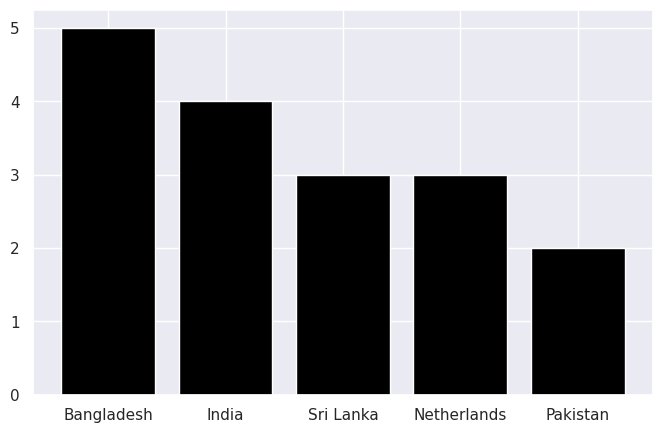

In [ ]:
# Exclude Team New Zealand
exclude = 'New Zealand'

# Filter out the opponent to exclude from the data
filtered_data = nz_win[nz_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by New Zealand.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="black")
plt.show()


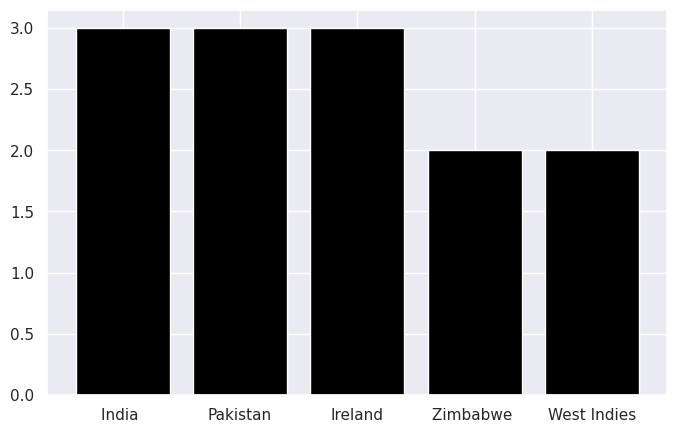

In [ ]:
# Exclude Team New Zealand
exclude = 'New Zealand'

# Filter out the opponent to exclude from the data
filtered_data = nz_win[nz_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by New Zealand.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="black")
plt.show()


## Win Percentage of New Zealand Against Each Team

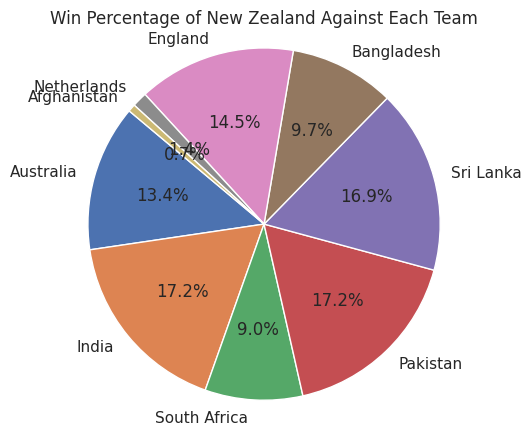

In [ ]:
# Number of wins against each team
# Out of the 794 ODI matches played by New Zealand, number of matches won against the following teams
team_win_counts = {
    'Australia': 39,
    'India': 50,
    'South Africa ': 26,
    'Pakistan': 50,
    'Sri Lanka': 49,
    'Bangladesh':28,
    'England': 42,
    'Netherlands': 4,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# New Zealand's's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of New Zealand Against Each Team')

# Display the pie chart
plt.show()


## Win Percentage of New Zealand in the ODI world cup

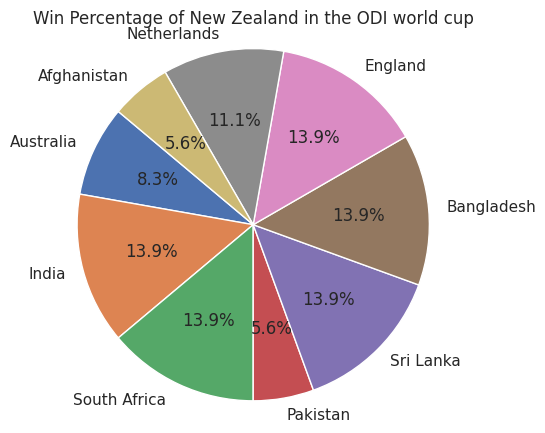

In [ ]:
# Number of wins against each team in the ODI world cup
# Out of the 89 ODI matches played by New Zealand in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_nz = {
    'Australia': 3,
    'India': 5,
    'South Africa ': 5,
    'Pakistan': 2,
    'Sri Lanka': 5,
    'Bangladesh': 5,
    'England': 5,
    'Netherlands': 4,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_nz = sum(team_win_counts_wc_nz.values())

# New Zealand's win percentages against each team is calculated
win_percentages_wc_nz = {team: (wins / total_matches_wc_nz) * 100 for team, wins in team_win_counts_wc_nz.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_nz.values(), labels=win_percentages_wc_nz.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of New Zealand in the ODI world cup')

# Display the pie chart
plt.show()


## Stats of Pakistan team

In [ ]:
# Filter the 'match_results' DataFrame to include rows where England played either as Team_1 or Team_2
df4 = match_results[(match_results['Team_1'] == 'England') | (match_results['Team_2'] == 'England')]

# Create a new DataFrame 'England' containing all rows from the filtered DataFrame
England = df4.iloc[:]

# Display the first few rows of the 'England' DataFrame
England.head()


,Date,Team_1,Team_2,Winner,Margin,Ground
8,12/06/2015,England,New Zealand,New Zealand,won by 13 runs,Kennington Oval
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
55,11/11/2015,Pakistan,England,Pakistan,Pakistan won by 6 wickets,Sheikh Zayed Stadium
57,13/11/2015,Pakistan,England,England,England won by 95 runs,Sheikh Zayed Stadium
58,17/11/2015,Pakistan,England,England,England won by 6 wickets,Sharjah Cricket Stadium


In [ ]:
# Filtering the 'England' dataframe to create a new dataframe 'England_win' containing rows where the 'Winner' column is 'England'.
England_win = England[England['Winner']=='England']
England_win.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
35,08/09/2015,England,Australia,England,won by 93 runs,Old Trafford
59,20/11/2015,Pakistan,England,England,England won by 84 runs,Dubai International Cricket Stadium
78,03/02/2016,South Africa,England,England,won by 39 runs,Mangaung Oval
80,06/02/2016,South Africa,England,England,won by 5 wickets,St George's Park
134,07/10/2016,Bangladesh,England,England,won by 21 runs,Shere Bangla National Stadium


## No.of wins for England against other teams

In [ ]:
# Exclude Team Englans's name
excluded_value = 'England'

# Filtering out rows with the excluded value
filtered_df = England_win[England_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)


Team_2
Pakistan        5
Australia       2
India           2
New Zealand     2
Ireland         2
Sri Lanka       2
West Indies     1
South Africa    1
Name: count, dtype: int64


In [ ]:
# Exclude Team England's name
excluded_value = 'England'

# Filtering out rows with the excluded value
filtered_df = England_win[England_win['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_1' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)


Team_1
Australia        4
Netherlands      3
South Africa     2
Bangladesh       2
New Zealand      2
Sri Lanka        2
South Africa     2
Bangladesh       2
Pakistan         1
West Indies      1
New Zealand      1
Sri Lanka        1
Ireland          1
India            1
Name: count, dtype: int64


## Displaying Team England's wins against other teams using bar graph

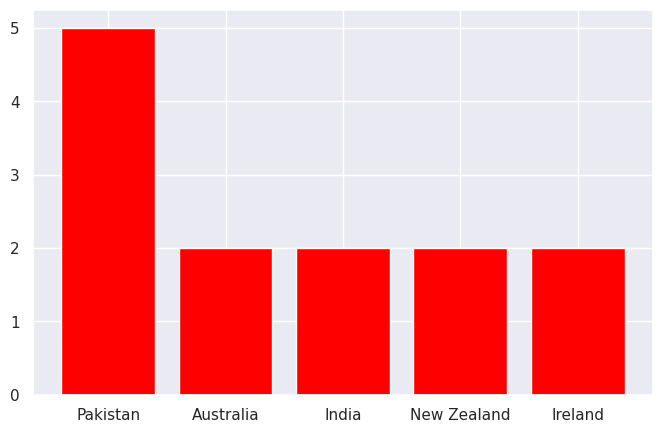

In [ ]:
# Exclude Team England
exclude = 'England'

# Filter out the opponent to exclude from the data
filtered_data = England_win[England_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by England.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="red")
plt.show()


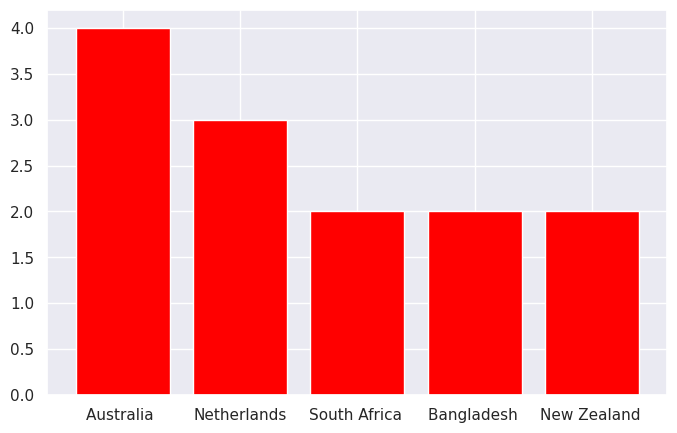

In [ ]:
# Exclude Team England
exclude = 'England'

# Filter out the opponent to exclude from the data
filtered_data = England_win[England_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by England.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="red")
plt.show()


## Win Percentage of England Against Each Team

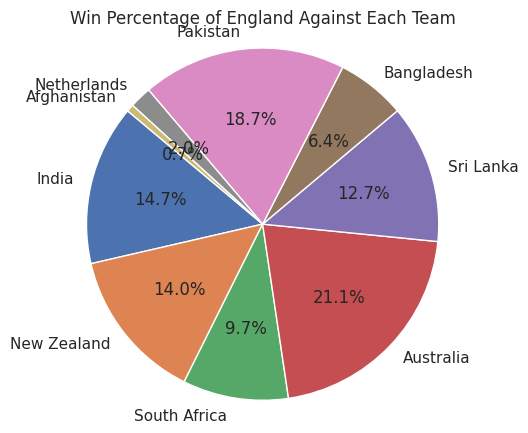

In [ ]:
# Number of wins against each team
# Out of the 775 ODI matches played by England, number of matches won against the following teams
team_win_counts = {
    'India': 44,
    'New Zealand': 42,
    'South Africa ': 29,
    'Australia': 63,
    'Sri Lanka': 38,
    'Bangladesh': 19,
    'Pakistan': 56,
    'Netherlands': 6,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches = sum(team_win_counts.values())

# England's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of England Against Each Team')

# Display the pie chart
plt.show()


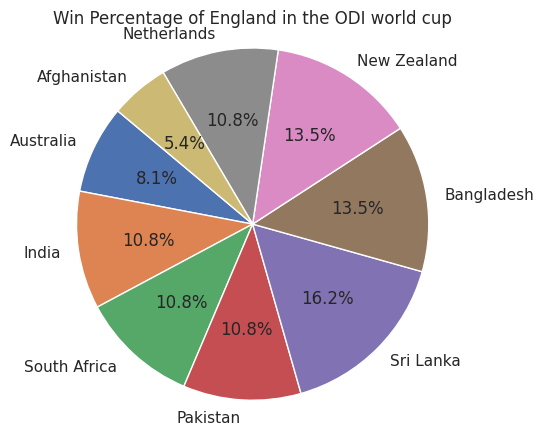

In [ ]:
# Number of wins against each team in the ODI world cup
# Out of the 83 ODI matches played by England in the ODI world cup, number of matches won against the following teams
team_win_counts_wc_eng = {
    'Australia': 3,
    'India': 4,
    'South Africa ': 4,
    'Pakistan': 4,
    'Sri Lanka': 6,
    'Bangladesh': 5,
    'New Zealand': 5,
    'Netherlands': 4,
    'Afghanistan': 2
}

# Total matches played is calculated
total_matches_wc_eng= sum(team_win_counts_wc_eng.values())

# England's win percentages against each team is calculated
win_percentages_wc_eng = {team: (wins / total_matches_wc_eng) * 100 for team, wins in team_win_counts_wc_eng.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages_wc_eng.values(), labels=win_percentages_wc_eng.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title for the pie chart
plt.title('Win Percentage of England in the ODI world cup')

# Display the pie chart
plt.show()


# Predictions
Moving on to predictions involves employing machine learning models to forecast outcomes.
### Displaying required Datasets

In [ ]:
world_cup = pd.read_csv("/content/drive/MyDrive/WC_Prediction/World_cup_2023.csv")
world_cup.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [ ]:
latest = pd.read_csv('/content/drive/MyDrive/WC_Prediction/Matches_World_cup_2023.csv')
latest.head()

,date,team1,team2,winner,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,05-10-2023,England,New Zealand,New Zealand,NaN,NaN,NaN,NaN
1,06-10-2023,Pakistan,Netherlands,Pakistan,NaN,NaN,NaN,NaN
2,07-10-2023,Afghanistan,Bangladesh,Bangladesh,NaN,NaN,NaN,NaN
3,07-10-2023,South Africa,Sri Lanka,South Africa,NaN,NaN,NaN,NaN
4,08-10-2023,Australia,India,India,NaN,NaN,NaN,NaN


In [ ]:
results = pd.read_csv("/content/drive/MyDrive/WC_Prediction/results.csv")
results.head()

,Date,team1,team2,winner,Margin,Ground
0,17-04-2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19-04-2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22-04-2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08-05-2015,Ireland,England,No result,No result,The Village
4,26-05-2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [ ]:
print(f'World_cup data shape  : {world_cup.shape}')
print(f'Results data shape  : {results.shape}')
print(f'Latest world cup data  shape  : {latest.shape}')

World_cup data shape  : (10, 14)
Results data shape  : (764, 6)
Latest world cup data  shape  : (42, 8)


In [ ]:
results = pd.concat([results, latest], axis=0)

results = results.reset_index(drop = True)
results.tail(5)

,Date,team1,team2,winner,Margin,Ground,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
801,NaN,Bangladesh,Sri Lanka,Bangladesh,NaN,NaN,06-11-2023,NaN,NaN,NaN,NaN
802,NaN,Afghanistan,Australia,Australia,NaN,NaN,07-11-2023,NaN,NaN,NaN,NaN
803,NaN,England,Netherlands,England,NaN,NaN,08-11-2023,NaN,NaN,NaN,NaN
804,NaN,New Zealand,Sri Lanka,New Zealand,NaN,NaN,09-11-2023,NaN,NaN,NaN,NaN
805,NaN,Afghanistan,South Africa,South Africa,NaN,NaN,10-11-2023,NaN,NaN,NaN,NaN


In [ ]:
results.shape

(806, 11)

In [ ]:
results = results[['team1', 'team2', 'winner']]
results

,team1,team2,winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
3,Ireland,England,No result
4,Pakistan,Zimbabwe,Pakistan
...,...,...,...
801,Bangladesh,Sri Lanka,Bangladesh
802,Afghanistan,Australia,Australia
803,England,Netherlands,England
804,New Zealand,Sri Lanka,New Zealand


## Feature Engineering

### Negating Teams that are not in the World Cup from the loaded datasets

In [ ]:
world_cup_teams = ['Australia','England' , 'South Africa' , 'Netherlands' , 'Pakistan', 'New Zealand' ,
                   'Sri Lanka', 'Afganistan',  'Bangladesh', 'India']

In [ ]:
df_teams_1 = results[results['team1'].isin(world_cup_teams)]
df_teams_2 = results[results['team2'].isin(world_cup_teams)]
df_winners = results[results['winner'].isin(world_cup_teams)]

df_team = pd.concat((df_teams_1, df_teams_2, df_winners), axis=0)

df_team.head()

,team1,team2,winner
0,Bangladesh,Pakistan,Bangladesh
1,Bangladesh,Pakistan,Bangladesh
2,Bangladesh,Pakistan,Bangladesh
4,Pakistan,Zimbabwe,Pakistan
5,Pakistan,Zimbabwe,Pakistan


### Encoding the 'winner' attribute

In [ ]:
df_team.loc[:,'Winning'] = np.where(df_team['winner']==df_team['team1'],1,2)
df_team.head()

,team1,team2,winner,Winning
0,Bangladesh,Pakistan,Bangladesh,1
1,Bangladesh,Pakistan,Bangladesh,1
2,Bangladesh,Pakistan,Bangladesh,1
4,Pakistan,Zimbabwe,Pakistan,1
5,Pakistan,Zimbabwe,Pakistan,1


In [ ]:
df_team.drop(columns=['winner'], axis=1, inplace=True)
df_team.head()

,team1,team2,Winning
0,Bangladesh,Pakistan,1
1,Bangladesh,Pakistan,1
2,Bangladesh,Pakistan,1
4,Pakistan,Zimbabwe,1
5,Pakistan,Zimbabwe,1


### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#Apply the encoding
df_team= pd.get_dummies(df_team, prefix=['team1', 'team2'], columns = ['team1', 'team2'], dtype=int, sparse=False)
df_team.head()

,Winning,team1_Afghanistan,team1_Australia,team1_Bangladesh,team1_England,team1_Hong Kong,team1_India,team1_Ireland,team1_Nepal,team1_Netherlands,...,team2_Netherlands,team2_New Zealand,team2_Oman,team2_Pakistan,team2_Scotland,team2_South Africa,team2_Sri Lanka,team2_United Arab Emirates,team2_West Indies,team2_Zimbabwe
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting Data

In [ ]:
x = df_team.drop(columns=['Winning'], axis=1)
y = df_team['Winning']

In [ ]:
# Splitting the data in the training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=34)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
#Define classifiers

classifiers = {
    'Random Forest' : RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Support Vector Classifier' : SVC()
}

for name, clf in classifiers.items():
  pipeline = Pipeline([('classifier',clf)])

  pipeline.fit(x_train, y_train)

  #Make Predictions
  y_pred = pipeline.predict(x_test)

  #Calculate the accuracy
  acc = accuracy_score(y_test, y_pred)

  print(f'{name}: ')
  print(f"Accuracy : {acc:.4f}")

Random Forest: 
Accuracy : 0.7290
Logistic Regression: 
Accuracy : 0.7263
Decision Tree: 
Accuracy : 0.7371
Support Vector Classifier: 
Accuracy : 0.7263


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = rf.predict(x_test)

In [ ]:
label_to_team = {1: 'Team_1' , 2:'Team_2'}

Winner =[label_to_team[label] for label in predictions]

print(Winner)

['Team_2', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_2', 'Team_2', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_2', 'Team_2', 'Team_2', 'Team_2', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_2', 'Team_1', 'Team_1', 'Team_2',

In [ ]:
rankings = pd.read_csv('/content/drive/MyDrive/WC_Prediction/Icc_ranking.csv')
rankings.head()

,Team_ranking,Team_name,Rating
0,1,Australia,118
1,2,Pakistan,116
2,3,India,115
3,4,New Zealand,104
4,5,England,101


In [ ]:
fixtures = pd.read_csv("/content/drive/MyDrive/WC_Prediction/Fixtures_World_cup_2023.csv")
fixtures.head()

,Round_number,Team_1,Team_2,Date,Location,Group,Result
0,1,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


In [ ]:
pred_set=[]

fixtures.insert(1, 'first_position', fixtures['Team_1'].map(rankings.set_index('Team_name')['Team_ranking']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(rankings.set_index('Team_name')['Team_ranking']))

fixtures = fixtures.iloc[:80, :]
fixtures.head()

,Round_number,first_position,second_position,Team_1,Team_2,Date,Location,Group,Result
0,1,5.0,NaN,England,New Zealand,5/10/2023,"Narendra Modi Stadium, Ahmedabad",Group A,NaN
1,1,NaN,10.0,Pakistan,Netherlands,6/10/2023,"Rajiv Gandhi International Stadium, Hyderabad",Group A,NaN
2,1,7.0,8.0,Bangladesh,Afghanistan,7/10/2023,"Himachal Pradesh Cricket Association Stadium, ...",Group A,NaN
3,1,6.0,9.0,South Africa,Sri Lanka,7/10/2023,"Arun Jaitley Stadium, Delhi",Group A,NaN
4,1,3.0,1.0,India,Australia,8/10/2023,"MA Chidambaram Stadium, Chennai",Group A,NaN


In [ ]:
for index, row in fixtures.iterrows():
  if row['first_position'] < row['second_position']:
    pred_set.append({'Team_1' :row['Team_1'] , 'Team_2' :row['Team_2'] , 'Winning_team' : None })
  else:
    pred_set.append({'Team_1' :row['Team_2'] , 'Team_2' :row['Team_1'] , 'Winning_team' : None })

pred_set = pd.DataFrame(pred_set)

pred_set.head()

,Team_1,Team_2,Winning_team
0,New Zealand,England,None
1,Netherlands,Pakistan,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,Australia,India,None


In [ ]:
backup_pred_set = pred_set

In [ ]:
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'], dtype=int)

missing_cols = set(df_team.columns) - set(pred_set.columns)

In [ ]:
for cols in missing_cols :
  pred_set[cols] = 0

pred_set = pred_set[df_team.columns]

pred_set = pred_set.drop(['Winning'], axis=1)
pred_set.head()

,team1_Afghanistan,team1_Australia,team1_Bangladesh,team1_England,team1_Hong Kong,team1_India,team1_Ireland,team1_Nepal,team1_Netherlands,team1_New Zealand,...,team2_Netherlands,team2_New Zealand,team2_Oman,team2_Pakistan,team2_Scotland,team2_South Africa,team2_Sri Lanka,team2_United Arab Emirates,team2_West Indies,team2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = rf.predict(pred_set)

England Vs New Zealand
Winner : England

Pakistan  Vs Netherlands
Winner : Pakistan 

Afghanistan Vs Bangladesh
Winner : Afghanistan

Sri Lanka Vs South Africa
Winner : Sri Lanka

India Vs Australia
Winner : India

New Zealand Vs Netherlands
Winner : New Zealand

Bangladesh Vs England
Winner : Bangladesh

Afghanistan Vs India
Winner : Afghanistan

Pakistan  Vs Sri Lanka
Winner : Pakistan 

South Africa Vs Australia
Winner : South Africa

New Zealand Vs Bangladesh
Winner : New Zealand

Afghanistan Vs England
Winner : Afghanistan

India Vs Pakistan
Winner : India

Sri Lanka Vs Australia
Winner : Sri Lanka

Netherlands Vs South Africa
Winner : Netherlands

New Zealand Vs Afghanistan
Winner : New Zealand

Bangladesh Vs India
Winner : Bangladesh

Pakistan Vs Australia
Winner : Pakistan

Netherlands Vs Sri Lanka
Winner : Netherlands

South Africa Vs England
Winner : South Africa

India Vs New Zealand
Winner : India

Pakistan  Vs Afghanistan
Winner : Pakistan 

Bangladesh Vs South Africa
Winn

In [ ]:
top_winners = latest['winner'].value_counts().head(4).index.tolist()

print(f"Top 4 teams : {top_winners}")

Top 4 teams : ['India', 'South Africa', 'Australia', 'New Zealand']


In [ ]:
# Predict the single match results of future

def predict_single_match(model, rankings, team_1, team_2):
  single_match_data = pd.DataFrame({
      'Team_1': [team_1],
      'Team_2':[team_2]
  })

  #Insert the team ranking data
  single_match_data.insert(1, 'first_position',single_match_data['Team_1'].map(rankings.set_index("Team_name")['Team_ranking']))
  single_match_data.insert(2, 'second_position',single_match_data['Team_2'].map(rankings.set_index("Team_name")['Team_ranking']))

  # Apply one hot encoding
  single_match_data = pd.get_dummies(single_match_data, prefix = ['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'], dtype=int)

  #Find the missing columns
  missing_cols = set(df_team.columns) - set(single_match_data.columns)

  #Set the missing columns to 0 and then keep only th ecolumns present

  for col in missing_cols:
    single_match_data[col] = 0

  single_match_data = single_match_data[df_team.columns]

  #Drop the winning column
  single_match_data = single_match_data.drop(['Winning'], axis=1)

  #Making the prediction
  prediction = model.predict(single_match_data)

  #print the result
  print(f"{team_1} vs {team_2}")

  if prediction[0] ==1 :
    print(f"Winner: {team_1}")
  else:
    print(f"Winner: {team_2}")

  print((""))


In [ ]:
## sample prediction
predict_single_match(rf, rankings, "Australia", "England")

Australia vs England
Winner: Australia



## Semi-finalists

In [ ]:
predict_single_match(rf, rankings, "India", "New Zealand")

India vs New Zealand
Winner: India



In [ ]:
predict_single_match(rf, rankings, "Australia", "South Africa")

Australia vs South Africa
Winner: Australia



Accurate predictions in cricket tournaments are challenging due to the unpredictable nature of the sport. Factors such as player form, team strategies, weather conditions, and match dynamics can influence outcomes. Your achievement in forecasting both the finalists and the top four teams showcases a keen insight into these variables.

In [ ]:
# end of the notebook

For predicting WC winner,
https://colab.research.google.com/drive/1mkfhOGXZXdqiDBpMQebOAKIApLoU-m-8#scrollTo=xm448Tv8Qidh